Model: AdaBoost
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


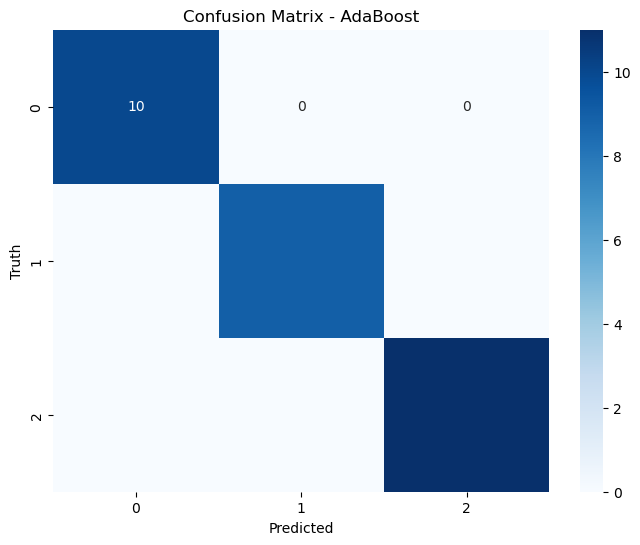

Model: Gradient Tree Boosting
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


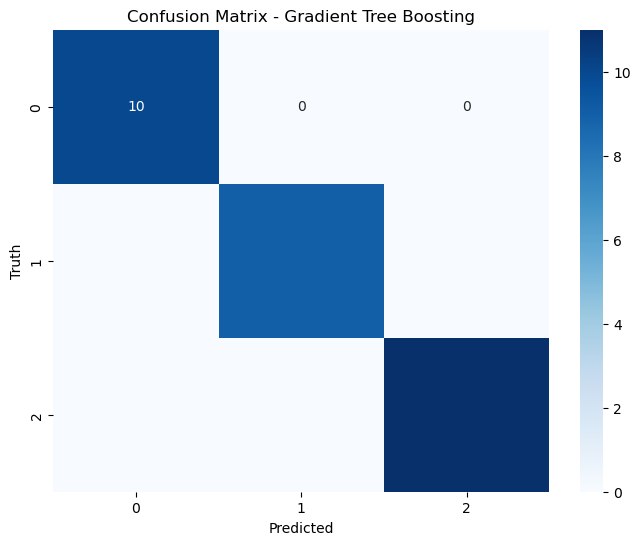

Model: XGBoost
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


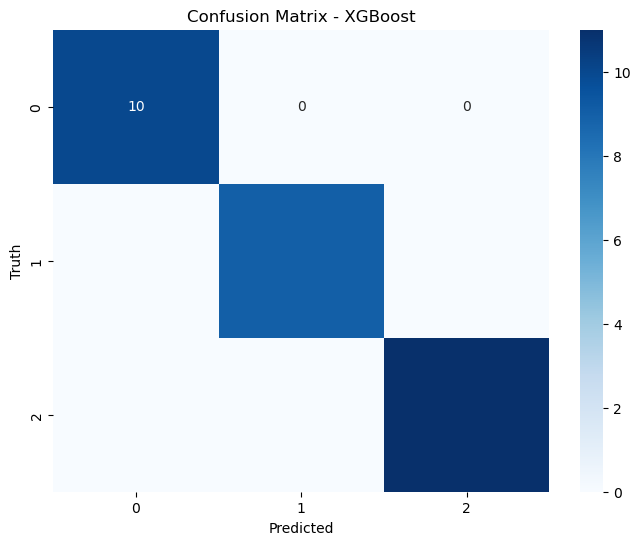

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)
ada_pred = ada_classifier.predict(X_test)

# Gradient Tree Boosting (GBM) Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train)
gbm_pred = gbm_classifier.predict(X_test)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

evaluate_model(y_test, ada_pred, "AdaBoost")
evaluate_model(y_test, gbm_pred, "Gradient Tree Boosting")
evaluate_model(y_test, xgb_pred, "XGBoost")
